In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xtrain-train-test-pickle/Xtrain_train.pickle
/kaggle/input/xtrain-train-test-pickle/Xtrain_test.pickle
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/pickled-dataset/Xtrainwtgt.pickle
/kaggle/input/pickled-dataset/Xtest.pickle


In [2]:
import matplotlib.pyplot as mpl
import seaborn as sb
import geopy.distance as distance
import datetime as dt
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
import cufflinks as cf
cf.go_offline()

## Overview

In [3]:
df1_train=pd.read_csv("../input/home-credit-default-risk/application_train.csv")

In [4]:
df1_test = pd.read_csv("../input/home-credit-default-risk/application_test.csv")

In [5]:
POS_CASH_balance = pd.read_csv('../input/home-credit-default-risk/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')
previous_application = pd.read_csv('../input/home-credit-default-risk/previous_application.csv')
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')


In [6]:
print("size of Application Train dataset:", df1_train.shape)
print("size of Application Test dataset:", df1_test.shape)



size of Application Train dataset: (307511, 122)
size of Application Test dataset: (48744, 121)


## optional read data size of subset

In [7]:
# print('Size of POS_CASH_balance data: ', POS_CASH_balance.shape)
# print('Size of bureau_balance data:', bureau_balance.shape)
# print('Size of previous_application data:', previous_application.shape)
# print('Size of installments_payments data:', installments_payments.shape)
# print('Size of credit_card_balance data:', credit_card_balance.shape)
# print('Size of bureau data:', bureau.shape)

## Insights of the data in each of the subset

In [8]:
df1_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df1_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Tackling MISSING VALUES  from dataset

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [11]:

missing_values = missing_values_table(df1_train)
print(" return TRAIN_DATASET containing the percentage of missing calue sin each column.",type(missing_values))
missing_values.sort_values(by="% of Total Values",ascending=False).head(15) 


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
 return TRAIN_DATASET containing the percentage of missing calue sin each column. <class 'pandas.core.frame.DataFrame'>


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [12]:
missing_values = missing_values_table(df1_test)
print(" return TEST DATASET containing the percentage of missing values in each column.",type(missing_values))
missing_values.sort_values(by="% of Total Values",ascending=False).head(15) 


Your selected dataframe has 121 columns.
There are 64 columns that have missing values.
 return TEST DATASET containing the percentage of missing values in each column. <class 'pandas.core.frame.DataFrame'>


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_AVG,33495,68.7
COMMONAREA_MEDI,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


## After removal redundant columns on preprocessing

In [13]:
df1_train_trim=df1_train[["SK_ID_CURR",
"TARGET",
"AMT_ANNUITY",
"AMT_CREDIT",
"AMT_GOODS_PRICE",
"AMT_INCOME_TOTAL",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_YEAR",
"CNT_CHILDREN",
"CNT_FAM_MEMBERS",
"CODE_GENDER",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"DAYS_ID_PUBLISH",
"DAYS_LAST_PHONE_CHANGE",
"DAYS_REGISTRATION",
"DEF_30_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"HOUR_APPR_PROCESS_START",
"NAME_CONTRACT_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"NAME_INCOME_TYPE",
"NAME_TYPE_SUITE",
"OBS_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"OCCUPATION_TYPE",
"ORGANIZATION_TYPE",
"OWN_CAR_AGE",
"REG_REGION_NOT_LIVE_REGION",
"REGION_POPULATION_RELATIVE",
"REGION_RATING_CLIENT",
"REGION_RATING_CLIENT_W_CITY",
"WEEKDAY_APPR_PROCESS_START"
]]

In [14]:
df1_test_trim=df1_test[["SK_ID_CURR",
"AMT_ANNUITY",
"AMT_CREDIT",
"AMT_GOODS_PRICE",
"AMT_INCOME_TOTAL",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_YEAR",
"CNT_CHILDREN",
"CNT_FAM_MEMBERS",
"CODE_GENDER",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"DAYS_ID_PUBLISH",
"DAYS_LAST_PHONE_CHANGE",
"DAYS_REGISTRATION",
"DEF_30_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"HOUR_APPR_PROCESS_START",
"NAME_CONTRACT_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"NAME_INCOME_TYPE",
"NAME_TYPE_SUITE",
"OBS_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"OCCUPATION_TYPE",
"ORGANIZATION_TYPE",
"OWN_CAR_AGE",
"REG_REGION_NOT_LIVE_REGION",
"REGION_POPULATION_RELATIVE",
"REGION_RATING_CLIENT",
"REGION_RATING_CLIENT_W_CITY",
"WEEKDAY_APPR_PROCESS_START"
]]

In [15]:
print("Trimmed training dataset",df1_train_trim.shape)
print("Trimmed Test dataset",df1_test_trim.shape)

Trimmed training dataset (307511, 44)
Trimmed Test dataset (48744, 43)


In [16]:
df1_Target=df1_train_trim[["TARGET"]]
type(df1_Target)
df1_Target.value_counts()
df1_Target.shape
df1_trim_Temp=df1_train_trim.drop(columns="TARGET")
print("df1_trim_Temp.shape",df1_trim_Temp.shape)




df1_trim_Temp.shape (307511, 43)


### Performing TRAIN TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
X_train_train, X_train_test, Y_train_train, Y_train_test = train_test_split (df1_trim_Temp, df1_Target, test_size=0.33, random_state=1)

In [18]:
print("X_train_train: ",X_train_train.shape)
print("Y_train_train: ",Y_train_train.shape)
print("X_train_test: ",X_train_test.shape)
print("Y_train_test: ",Y_train_test.shape)


X_train_train:  (206032, 43)
Y_train_train:  (206032, 1)
X_train_test:  (101479, 43)
Y_train_test:  (101479, 1)


In [19]:
X_train_train["TARGET"]=Y_train_train["TARGET"]
X_train_test["TARGET"]=Y_train_test["TARGET"]
print("X_train_train:",X_train_train.shape)
print("X_train_test:",X_train_test.shape)

X_train_train: (206032, 44)
X_train_test: (101479, 44)


In [20]:
X_train_train.to_pickle("Xtrain_train.pickle")
X_train_test.to_pickle("Xtrain_test.pickle")


In [21]:
X_TRAIN=pd.read_pickle("../input/xtrain-train-test-pickle/Xtrain_train.pickle")
X_TEST=pd.read_pickle("../input/xtrain-train-test-pickle/Xtrain_test.pickle")

## PICKLING THE TRIMMED DATSETS OF BOTH TRAIN AND TEST

In [22]:
# df1_test_trim.to_pickle("Xtest.pickle")
# df1_train_trim.to_pickle("Xtrainwtgt.pickle")

In [23]:
# X_TRAIN=pd.read_pickle('../input/pickled-dataset/Xtrainwtgt.pickle')
# X_TEST=pd.read_pickle("../input/pickled-dataset/Xtest.pickle")


In [24]:
print(X_TRAIN.shape)
print(X_TEST.shape)


(206032, 44)
(101479, 44)


## Correlation with repsect to each of feature set

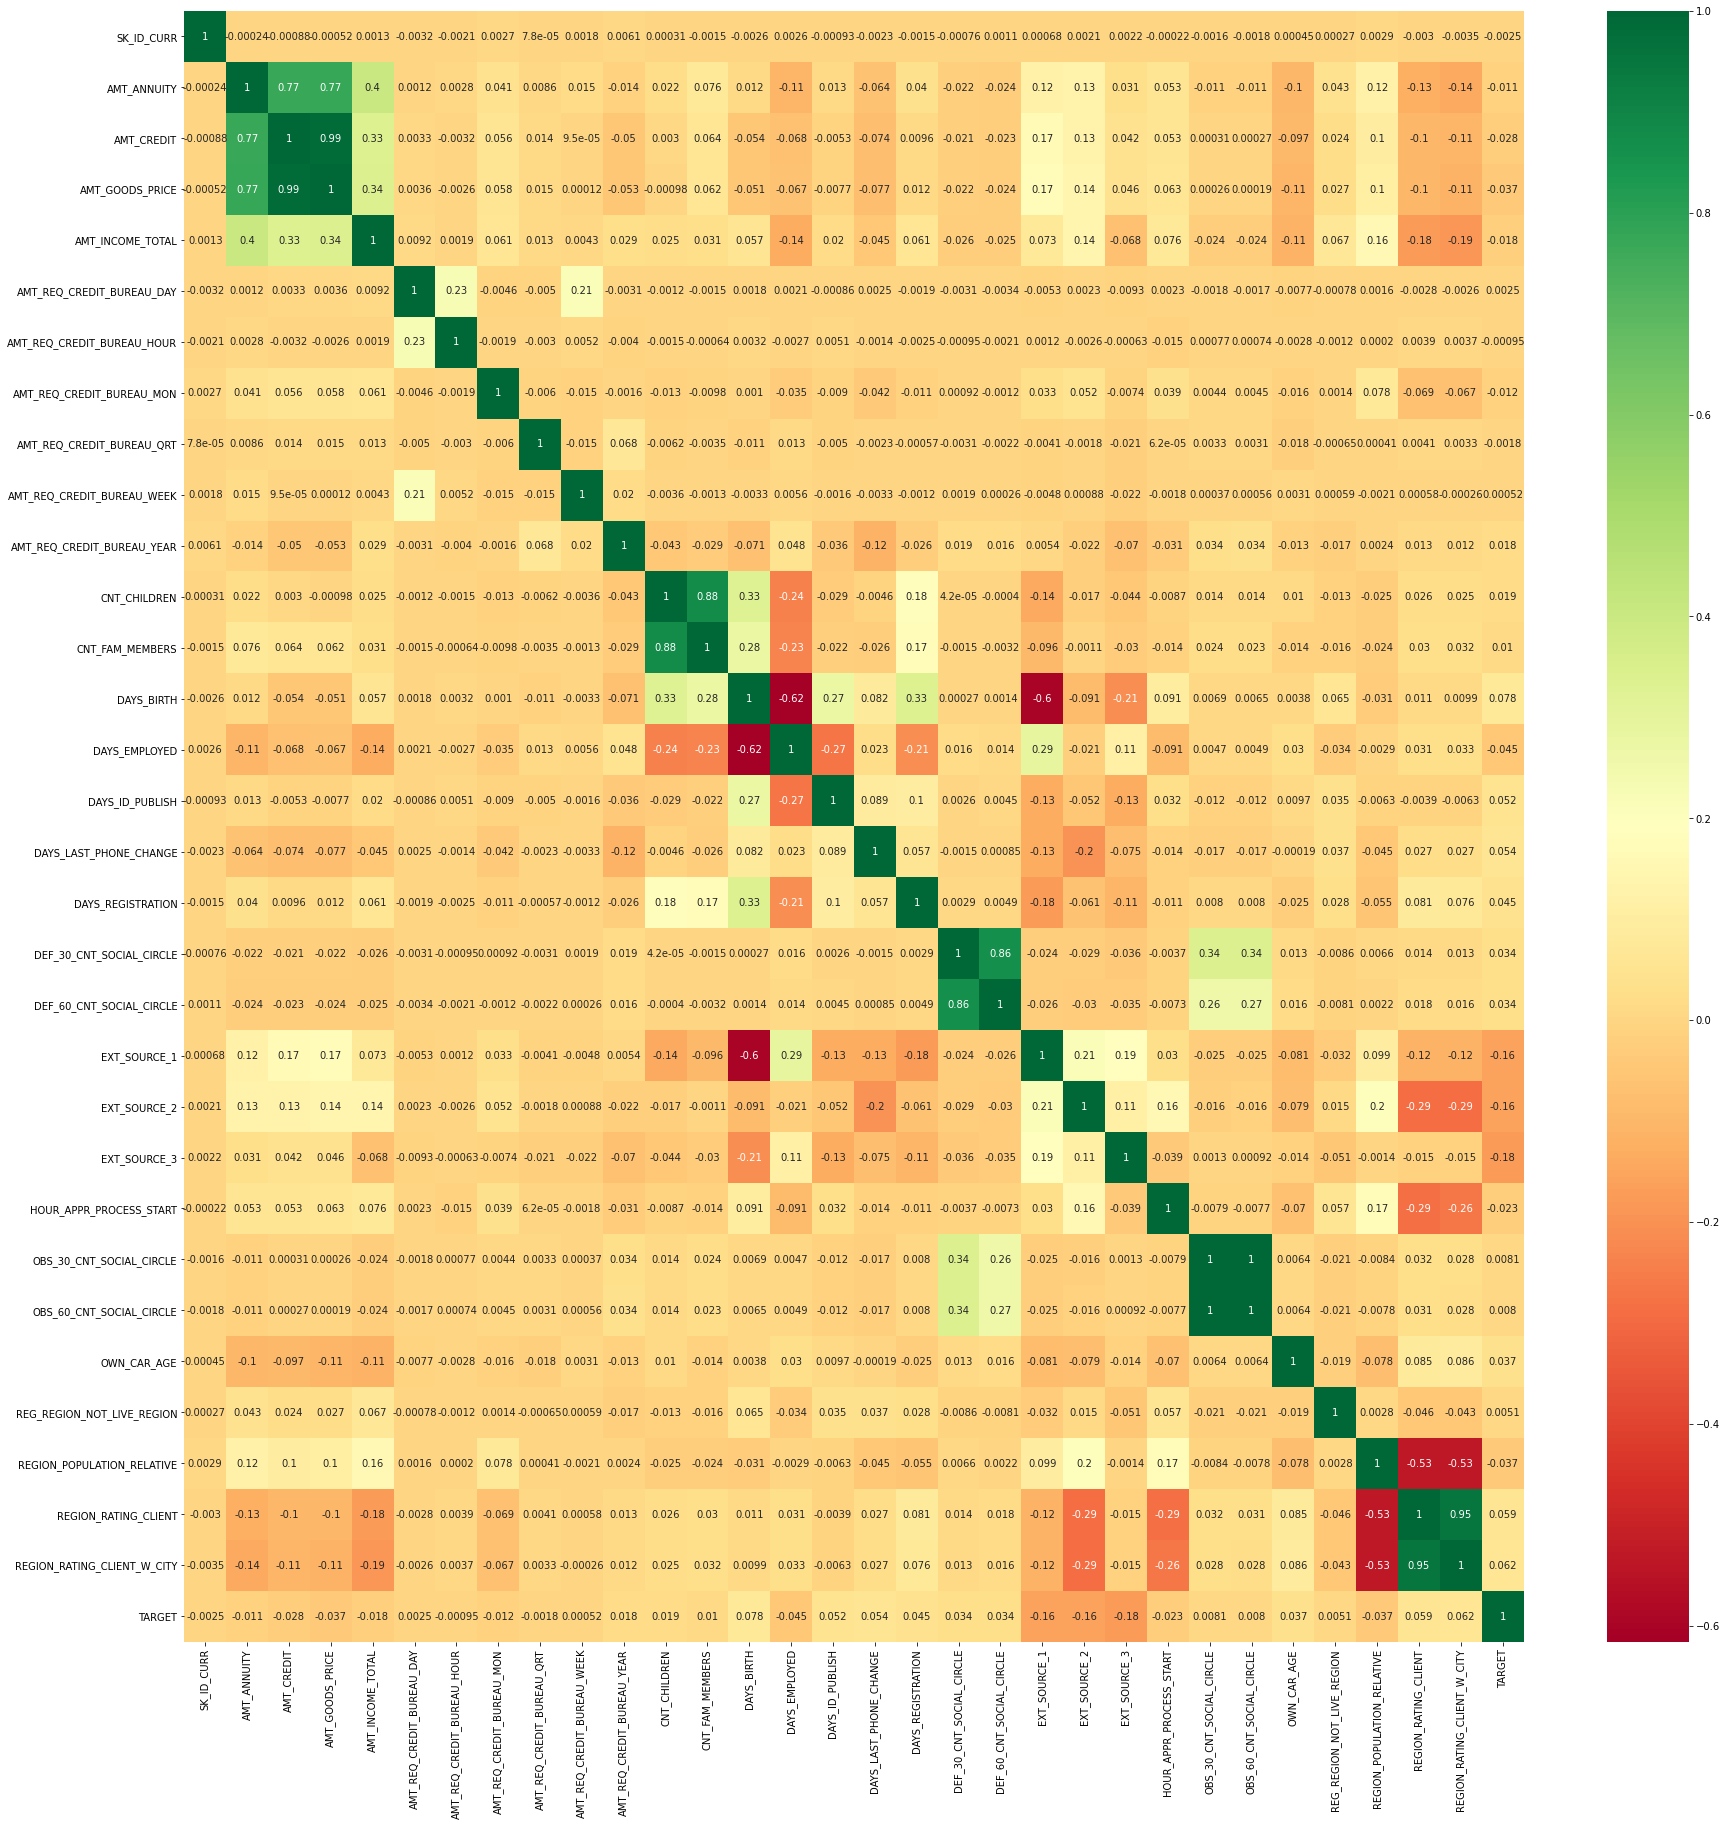

In [25]:
mpl.figure(figsize=(30,30))

self_corrmat_plot=sb.heatmap(X_TRAIN.corr(),annot=True,cmap="RdYlGn")


## Correlation with respect to target

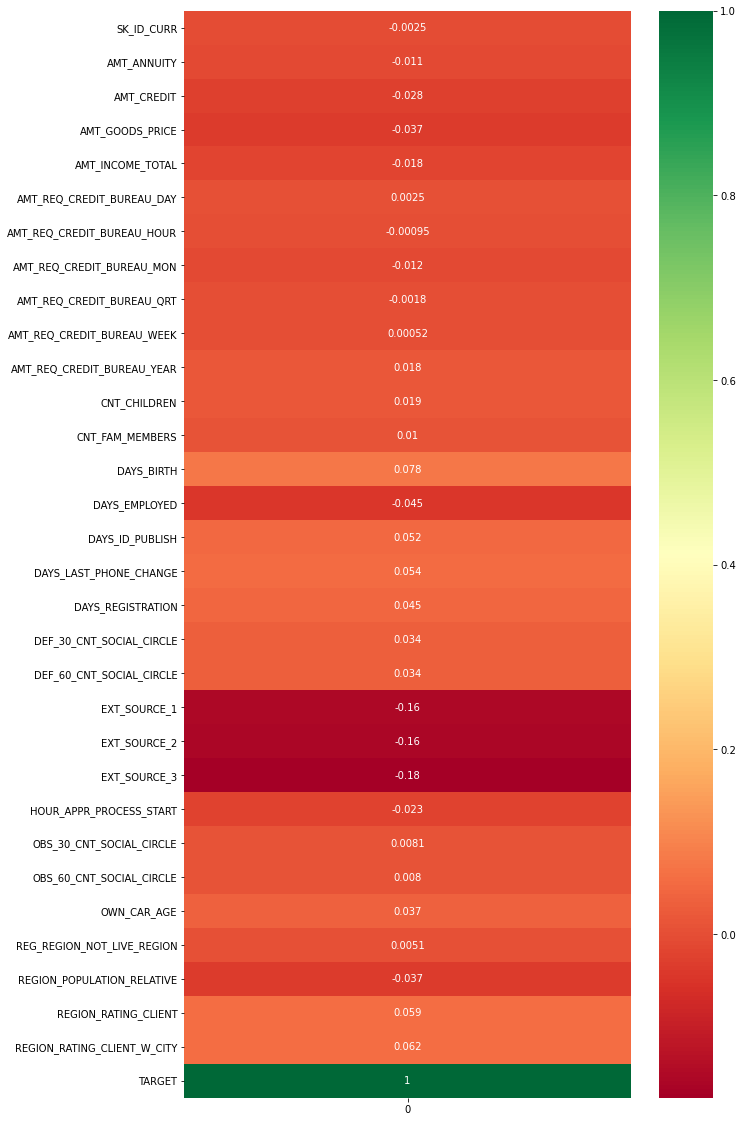

In [26]:
corrmat_train=pd.DataFrame(X_TRAIN.corrwith(X_TRAIN["TARGET"],axis=0))
type(corrmat_train)
mpl.figure(figsize=(10,20))

corrmat_train_plot=sb.heatmap(corrmat_train,annot=True,cmap="RdYlGn")

## Examine the distribution of datasetbased on target column

In [27]:
measure_data=pd.DataFrame(X_TRAIN["TARGET"].value_counts())
measure_data


,TARGET
0,189404
1,16628


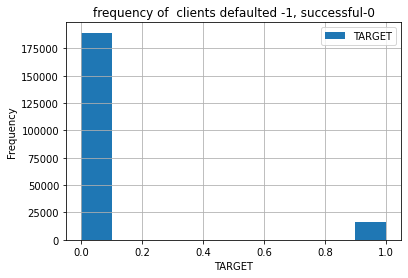

In [28]:
X_TRAIN['TARGET'].astype(int).plot.hist().grid();
mpl.title("frequency of  clients defaulted -1, successful-0")
mpl.xlabel("TARGET")
mpl.legend()

# for i in range(len(measure_data)):
#     x.append(measure_data.iloc[i,0])

# print(mpl.pie(x,labels=["defaulted","repayed"]))
# #(measure_data.iloc[1,0])

## LOAN TYPE

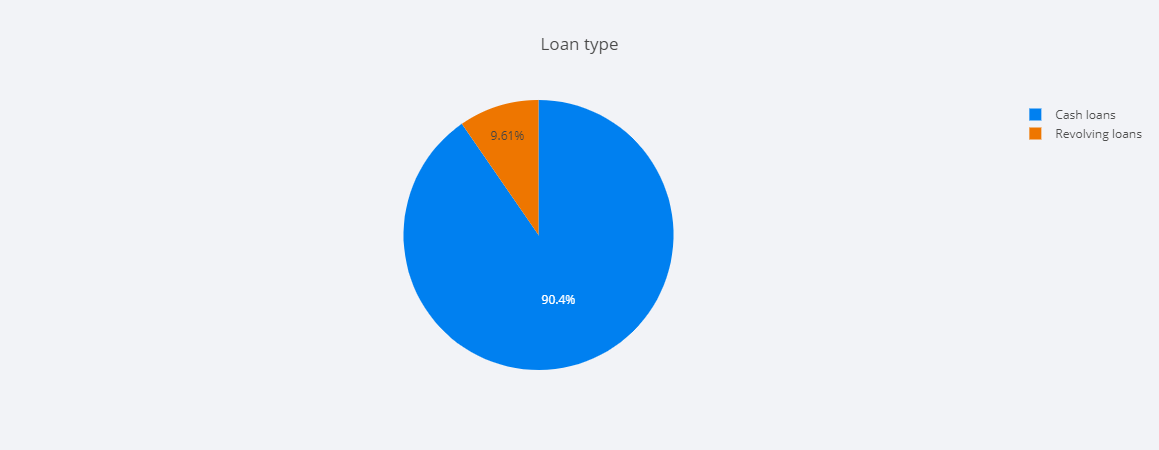

In [29]:

cf.set_config_file(theme='polar')
contract_val = X_TRAIN['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Loan type')

In [30]:
#Shapes of all the dataframes unitl now
print(X_TRAIN.shape)
X_TEST.shape

(206032, 44)


(101479, 44)

In [31]:
X_TRAIN.dtypes.value_counts()   
        

float64    22
object     12
int64      10
dtype: int64

## 1 "HOT" ENCODING to address the Categorical dataypes


In [32]:
X_TRAIN_ENCOD=pd.get_dummies(X_TRAIN,drop_first=True)
X_TEST_ENCOD=pd.get_dummies(X_TEST,drop_first=True)

Temp_Xtrain_Encod=pd.get_dummies(X_TRAIN,drop_first=True)
Temp_Xtest_Encod=pd.get_dummies(X_TEST,drop_first=True)

X_TRAIN_ENCOD1=pd.get_dummies(X_TRAIN)
X_TEST_ENCOD1=pd.get_dummies(X_TEST)

In [33]:

print(X_TRAIN_ENCOD.shape)
print(X_TEST_ENCOD.shape)

(206032, 144)
(101479, 142)


## ALIGNING THE FEATURES IN BOTH THE TRAIN AND TEST DATASET for training the WEIGHT vector.(CAUTION "TARGET" COLUMn in train_dataset)

In [34]:
temp_df=X_TRAIN_ENCOD["TARGET"]
X_TRAIN_ENCOD,X_TEST_ENCOD=X_TRAIN_ENCOD.align(X_TEST_ENCOD,join="inner",axis=1)
X_TRAIN_ENCOD["TARGET"]=temp_df        
print(X_TRAIN_ENCOD.shape)
print(X_TEST_ENCOD.shape)

(206032, 142)
(101479, 142)


## Verify presence of Anomaly in Data INPUT By User (with respect to furnishing details)
### a. Consider Date of birth

In [35]:
(X_TRAIN_ENCOD['DAYS_BIRTH'] / -365).describe()

count    206032.000000
mean         43.944907
std          11.967652
min          21.021918
25%          34.010959
50%          43.178082
75%          53.950685
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### b. Considering no of days Employed as  a factor(out of curiousity)

In [36]:
(X_TRAIN_ENCOD["DAYS_EMPLOYED"]/ -(365)).describe()

count    206032.000000
mean       -175.174672
std         387.327287
min       -1000.665753
25%           0.789041
50%           3.312329
75%           7.547945
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

***We could find the anomaly in the no of years worked by a client, with the help of following plot***

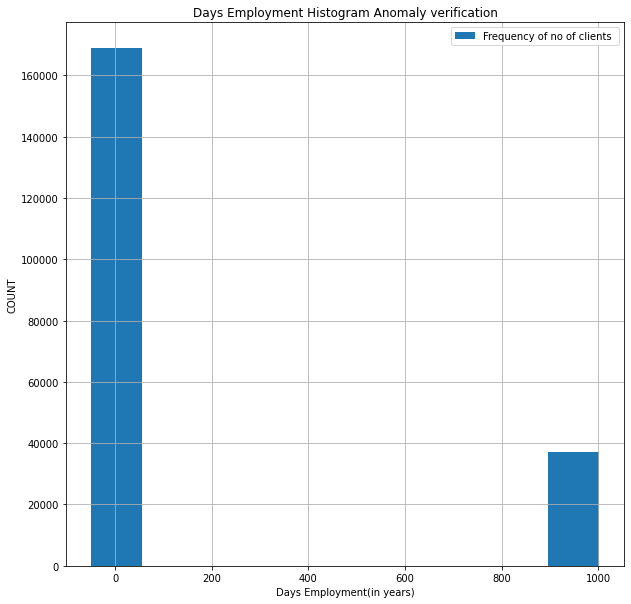

In [37]:
mpl.figure(figsize=(10,10))
mpl.hist(X_TRAIN_ENCOD["DAYS_EMPLOYED"]/365,bins=10, label = 'Frequency of no of clients ');
mpl.xlabel('Days Employment(in years)')
mpl.ylabel('COUNT')
mpl.title('Days Employment Histogram Anomaly verification')
mpl.grid()
mpl.legend()


***CHECKING THE CREDIBALITY OF ANOMALIES IN LOAN REPAYMENT***

In [38]:
anom = X_TRAIN_ENCOD[X_TRAIN_ENCOD['DAYS_EMPLOYED'] == 365243]
non_anom = X_TRAIN_ENCOD[X_TRAIN_ENCOD['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.37% of loans
There are 37168 anomalous days of employment


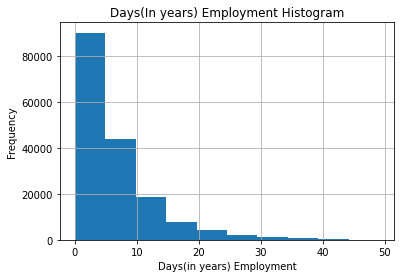

In [39]:
# Replace the anomalous values with nan
X_TRAIN_ENCOD['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(X_TRAIN_ENCOD['DAYS_EMPLOYED']/-365).plot.hist(title = 'Days(In years) Employment Histogram');
mpl.xlabel('Days(in years) Employment');
mpl.grid()

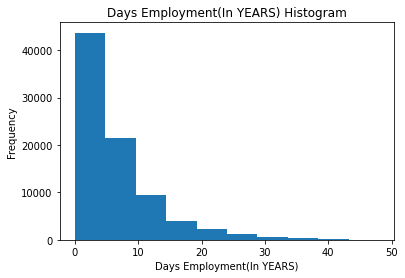

In [40]:
"""similarly perform the same for test datasetl"""

# Replace the anomalous values with nan
X_TEST_ENCOD['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(X_TEST_ENCOD['DAYS_EMPLOYED']/-365).plot.hist(title = 'Days Employment(In YEARS) Histogram');
mpl.xlabel('Days Employment(In YEARS)');

### Correlation features for a given TARGET wiht respect to the XTRAIN(trimmed)


In [41]:

Correlation_df=pd.DataFrame(X_TRAIN_ENCOD.corrwith(X_TRAIN_ENCOD["TARGET"],axis=0))
#IF WE DIDRECTLY PERFORM CORR WITH tothe DF_4_TARGET WE RECEIVE ALL NaN values.
print(Correlation_df.sort_values(by=0,ascending=False).head(15))
print(Correlation_df.sort_values(by=0,ascending=False).tail(15))
Correlation_df.shape

                                                          0
TARGET                                             1.000000
DAYS_BIRTH                                         0.077690
DAYS_EMPLOYED                                      0.075040
REGION_RATING_CLIENT_W_CITY                        0.061537
REGION_RATING_CLIENT                               0.058868
NAME_INCOME_TYPE_Working                           0.057607
DAYS_LAST_PHONE_CHANGE                             0.053863
CODE_GENDER_M                                      0.053482
DAYS_ID_PUBLISH                                    0.051629
NAME_EDUCATION_TYPE_Secondary / secondary special  0.047464
DAYS_REGISTRATION                                  0.044645
OCCUPATION_TYPE_Laborers                           0.043897
OWN_CAR_AGE                                        0.037071
DEF_30_CNT_SOCIAL_CIRCLE                           0.033700
DEF_60_CNT_SOCIAL_CIRCLE                           0.033506
                                        

(142, 1)

### .00-.19 “very weak”
### .20-.39 “weak”
### .40-.59 “moderate”
### .60-.79 “strong”
### .80-1.0 “very strong”

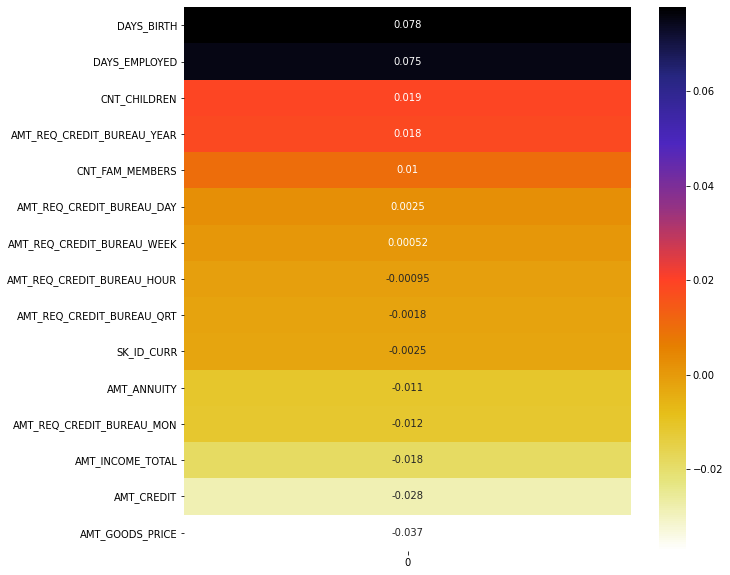

In [42]:
mpl.figure(figsize=(10,10))
g=sb.heatmap(Correlation_df.head(15).sort_values(by=0,ascending=False),cmap=mpl.cm.CMRmap_r,annot= True)

### Considering Such correlation columns cwe consider is the AGE factor to be mapped with the target vector, to assess the loan repayment ability

#### As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

## provides a list of clients of various age groups who acts as a customer

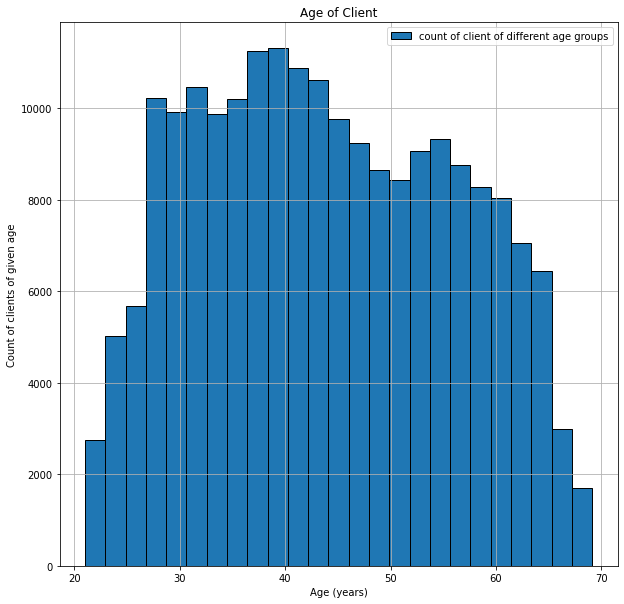

In [43]:
mpl.figure(figsize=(10,10))
# Plot the distribution of ages in years
mpl.hist(X_TRAIN_ENCOD['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25,label="count of client of different age groups")  # bin=width of each bar
mpl.title('Age of Client'); 
mpl.xlabel('Age (years)');
mpl.ylabel('Count of clients of given age');
mpl.grid()
mpl.legend()
#X_TRAIN_ENCOD['DAYS_BIRTH'].count()

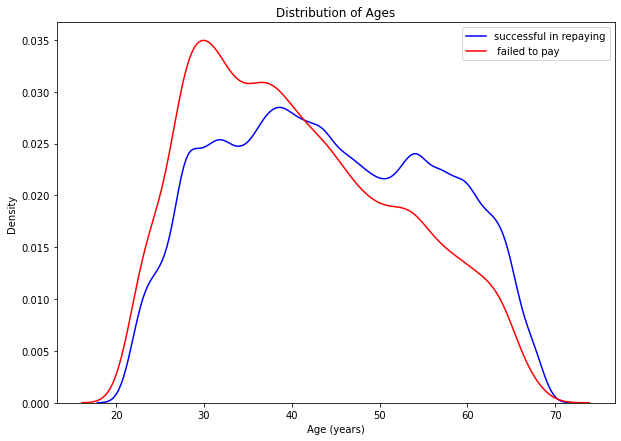

In [44]:
'''KDE PLOT'''
mpl.figure(figsize = (10,7))

# KDE plot of loans that were repaid on time
sb.kdeplot(X_TRAIN_ENCOD.loc[X_TRAIN_ENCOD['TARGET'] == 0, 'DAYS_BIRTH'] / -365,color='b',label="successful in repaying")

#0 KDE plot of loans which were not repaid on time
sb.kdeplot(X_TRAIN_ENCOD.loc[X_TRAIN_ENCOD['TARGET'] == 1, 'DAYS_BIRTH'] / -365,color='r',label=" failed to pay")

# Labeling of plot
mpl.xlabel('Age (years)'); mpl.ylabel('Density');
mpl.title('Distribution of Ages');
mpl.legend()


In [45]:
# Age information into a separate dataframe
age_data = X_TRAIN_ENCOD[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = (age_data['DAYS_BIRTH'] / -365)

# Bin the age data

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 10))
#age_data[["TARGET","YEARS_BINNED"]].value_counts()


In [46]:
age_group=age_data.groupby(by="YEARS_BINNED").mean()
age_group

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.556]",0.115634,-8642.681026,23.678578
"(25.556, 31.111]",0.113273,-10426.326101,28.565277
"(31.111, 36.667]",0.098196,-12367.417916,33.883337
"(36.667, 42.222]",0.084384,-14384.447140,39.409444
"(42.222, 47.778]",0.076490,-16393.032078,44.912417
"(47.778, 53.333]",0.070575,-18456.868313,50.566763
"(53.333, 58.889]",0.058373,-20447.570297,56.020741
"(58.889, 64.444]",0.053143,-22454.183026,61.518310
"(64.444, 70.0]",0.041334,-24114.028595,66.065832


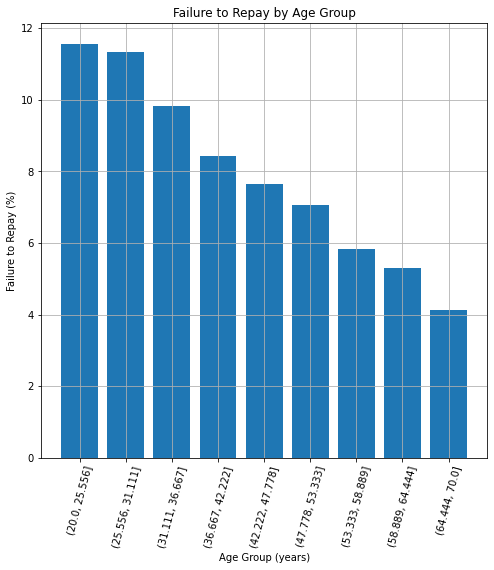

In [47]:
mpl.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
mpl.bar(age_group.index.astype(str), 100 * age_group['TARGET'])

# Plot labeling
mpl.xticks(rotation = 75); mpl.xlabel('Age Group (years)'); mpl.ylabel('Failure to Repay (%)')
mpl.title('Failure to Repay by Age Group');
mpl.grid()

## Implementation of effect on external Sources on TARGET "

278268   -29.978082
196476   -58.783562
217178   -52.298630
217505   -52.693151
291045   -36.208219
            ...    
21440    -36.849315
117583   -56.142466
73349    -35.534247
267336   -44.556164
128037   -39.556164
Name: DAYS_BIRTH, Length: 206032, dtype: float64


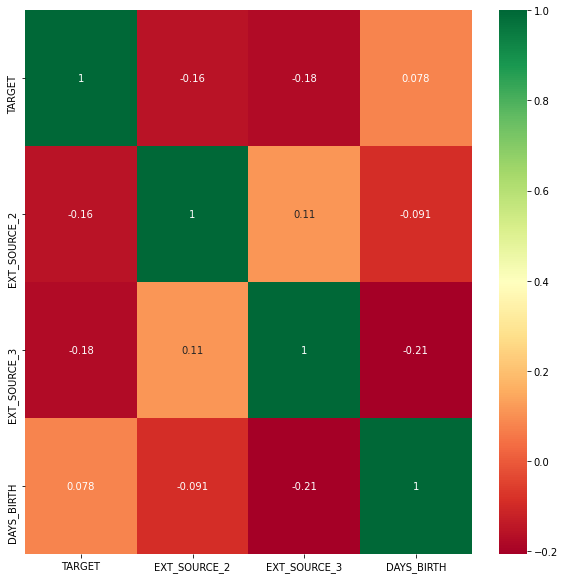

In [48]:
external_df=X_TRAIN_ENCOD[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].copy(deep=True)
external_df["DAYS_BIRTH"]=external_df["DAYS_BIRTH"]/365
print(external_df["DAYS_BIRTH"])
"""X_TRAIN["DAYS_BIRTH"] age check (-ve or +ve)"""
#print(df5_twmp2["DAYS_BIRTH"])
EXcorrmat=pd.DataFrame(external_df.corr())

#if correlation is to be performed with particular columns then place it in this frmat Xcorrmat=external_df.corr()["target"] ''
#example:EXcorrmat=pd.DataFrame(external_df.corr()["target"])

#top_corr_features=EXcorrmat. 
mpl.figure(figsize=(10,10)) 
 #plot heat map
g=sb.heatmap(EXcorrmat,annot=True,cmap="RdYlGn")

# Feature Egnineering
### This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning.

#### INdiviual variables alone  may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target

In [49]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = X_TRAIN_ENCOD[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.156414,-0.158822,-0.177156,0.077690
EXT_SOURCE_1,-0.156414,1.000000,0.213643,0.188076,-0.598786
EXT_SOURCE_2,-0.158822,0.213643,1.000000,0.111758,-0.091237
EXT_SOURCE_3,-0.177156,0.188076,0.111758,1.000000,-0.206427
DAYS_BIRTH,0.077690,-0.598786,-0.091237,-0.206427,1.000000


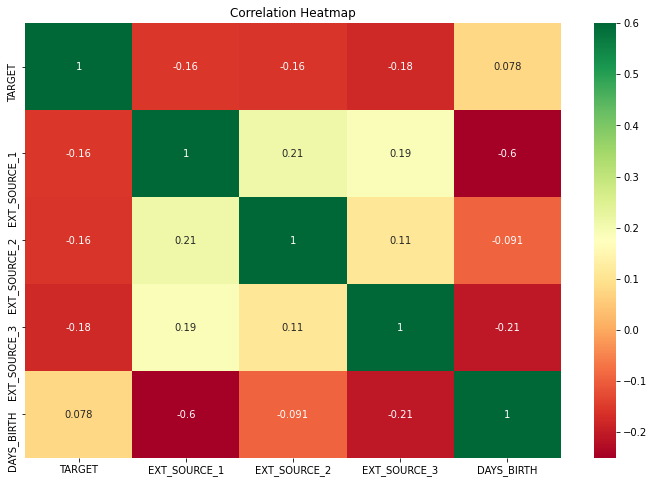

In [50]:
mpl.figure(figsize = (12, 8))

# Heatmap of correlations
sb.heatmap(ext_data_corrs, cmap = "RdYlGn", vmin = -0.25, annot = True, vmax = 0.6)
mpl.title('Correlation Heatmap');

### finding relationship between tha tof external variable and that of target

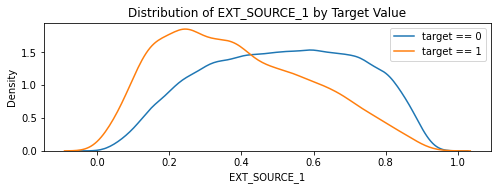

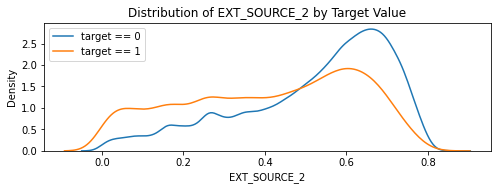

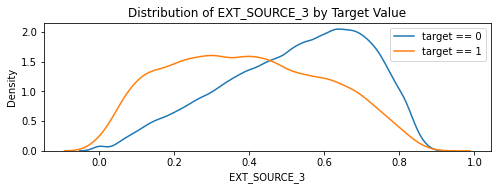

In [51]:
# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    mpl.figure(figsize=(8,8))
    # create a new subplot for each source
    mpl.subplot(3, 1, i + 1)
    # plot repaid loans
    sb.kdeplot(X_TRAIN_ENCOD.loc[X_TRAIN_ENCOD['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sb.kdeplot(X_TRAIN_ENCOD.loc[X_TRAIN_ENCOD['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    mpl.title('Distribution of %s by Target Value' % source)
    mpl.xlabel('%s' % source);
    mpl.ylabel('Density');
    mpl.legend()

## feature engineering with respect inroduction of new features


In [52]:
app_train_domain = X_TRAIN_ENCOD.copy()
app_test_domain = X_TEST_ENCOD.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']


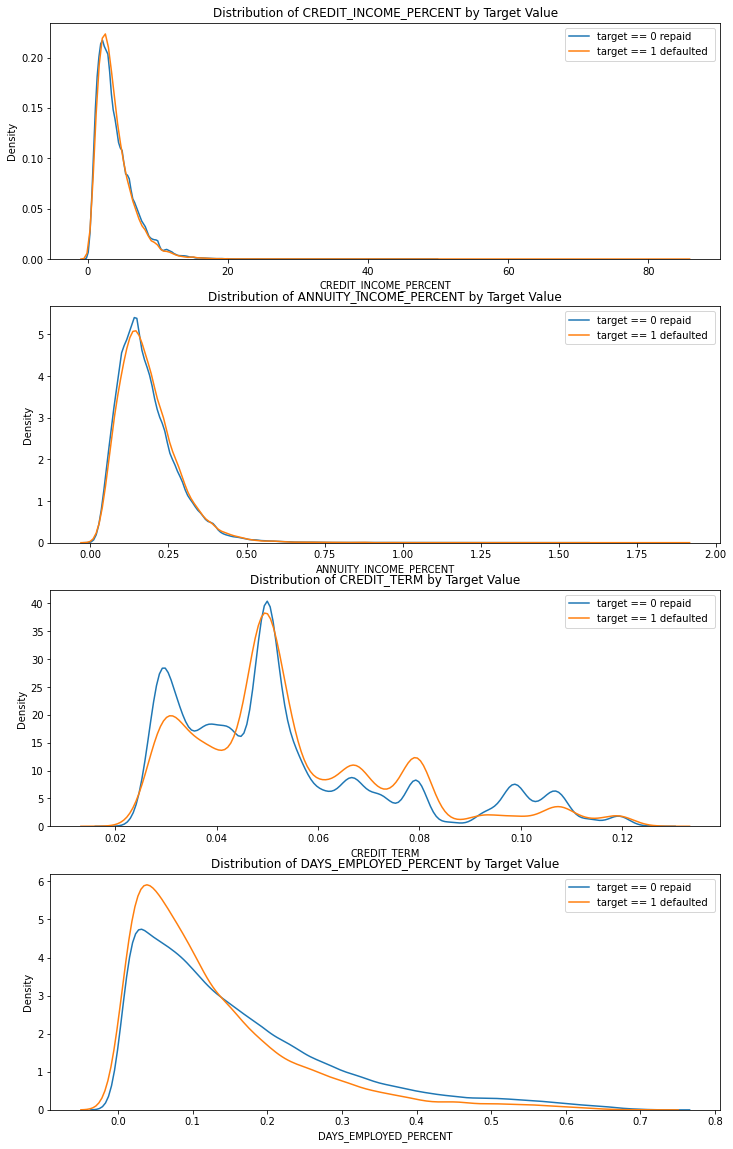

In [53]:
mpl.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    mpl.subplot(4, 1, i + 1)
    # plot repaid loans
    sb.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0 repaid')
    # plot loans that were not repaid
    sb.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1 defaulted ')
    
    # Label the plots
    mpl.title('Distribution of %s by Target Value' % feature)
    mpl.xlabel('%s' % feature);
    mpl.ylabel('Density');
    mpl.legend()
    


### we will use all of thees features after encoding the categorical variables.& Preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

# *** IMPUTATION & NORMALIZATION OF FEATURES ***

In [54]:
from sklearn.preprocessing import MinMaxScaler
#def normalization_imputation(trainer,test)
# Drop the target from the training data
if 'TARGET' in X_TRAIN_ENCOD:
    train1 = X_TRAIN_ENCOD.drop(columns = ['TARGET'])
else:
    train1 = X_TRAIN_ENCOD.copy()
    
# Feature names
features = list(train1.columns)
if 'TARGET' in X_TEST_ENCOD:
    test1 = X_TEST_ENCOD.drop(columns = ['TARGET'])
else:
    test1 = X_TEST_ENCOD.copy()

# Copy of the testing data

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train1)

# Transform both training and testing data
train1 = imputer.transform(train1)
test1 = imputer.transform(test1)

# Repeat with the scaler
scaler.fit(train1)
train1 = scaler.transform(train1)
test1 = scaler.transform(test1)

print('Training data shape: ', train1.shape)
print('Testing data shape: ', test1.shape)


Training data shape:  (206032, 141)
Testing data shape:  (101479, 141)


# ***PERFORM LOGISTIC REGRESSION with minimal LAMBDA***

In [55]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001,verbose=1)

# Train on the training data
log_reg.fit(train1,Y_train_train["TARGET"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(C=0.0001, verbose=1)

In [56]:
# Make predictions
# Here we choose to select the second column only.
log_reg_prediction_train = log_reg.predict_proba(train1)[:, 1]


In [57]:
LOG_REG_RESULT_OP_DF_TRAIN=X_TRAIN_ENCOD[["SK_ID_CURR"]]
LOG_REG_RESULT_OP_DF_TRAIN["TRAINED_TARGET"]=log_reg_prediction_train
LOG_REG_RESULT_OP_DF_TRAIN.shape


(206032, 2)

In [58]:
LOG_REG_RESULT_OP_DF_TRAIN.head(10)

,SK_ID_CURR,TRAINED_TARGET
278268,422402,0.080025
196476,327813,0.067854
217178,351636,0.085318
217505,352018,0.077230
291045,437159,0.094444
132608,253805,0.083009
144480,267530,0.074394
102669,219182,0.108304
101512,217859,0.085523
190549,320935,0.103997


In [59]:
# Make predictions
# Here we choose to select the second column only.
log_reg_prediction_test = log_reg.predict_proba(test1)[:, 1]


### **** the above prediction is a 2 d- array containing probability of capability of loan being repaid andd defaulted repsectively*** 

In [60]:
LOG_REG_RESULT_OP_DF_TEST=X_TEST_ENCOD[["SK_ID_CURR"]]
LOG_REG_RESULT_OP_DF_TEST["TEST_TARGET"]=log_reg_prediction_test

### INFERENCE from the result of output target 

In [61]:
LOG_REG_RESULT_OP_DF_TEST.head(10)

,SK_ID_CURR,TEST_TARGET
64282,174545,0.066439
94645,209898,0.101792
306349,454938,0.087035
258314,398930,0.086406
87597,201672,0.116899
27731,132243,0.075526
284391,429350,0.093421
267734,410203,0.070020
238789,376596,0.079828
299374,446827,0.084852


In [62]:
log_reg_prediction_test = log_reg.predict_proba(test1)[:, 1]


### ROC FOR LOG REGRESION ON TEST

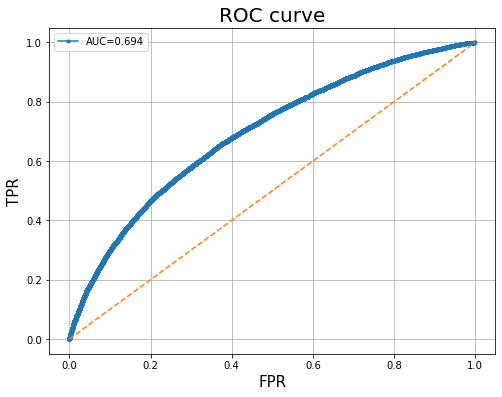

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_train_test,log_reg_prediction_test)
auc = roc_auc_score(Y_train_test,log_reg_prediction_test)
mpl.figure(figsize=(8,6))
mpl.plot(fpr, tpr, marker='.')
mpl.plot([0, 1], [0, 1], linestyle='--')
mpl.title('ROC curve', fontsize = 20)
mpl.xlabel('FPR', fontsize=15)
mpl.ylabel('TPR', fontsize=15)
mpl.grid()
mpl.legend(["AUC=%.3f"%auc])
mpl.show()

### ROC for random Forest algorithm 

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)


In [65]:
random_forest.fit(train1,Y_train_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.6s finished


In [66]:
feature_importances.sort_values(by="importance",ascending=False)


,feature,importance
21,EXT_SOURCE_2,6.438326e-02
22,EXT_SOURCE_3,5.941450e-02
13,DAYS_BIRTH,4.623643e-02
15,DAYS_ID_PUBLISH,4.610502e-02
17,DAYS_REGISTRATION,4.561498e-02
...,...,...
49,NAME_INCOME_TYPE_Maternity leave,3.071403e-05
114,ORGANIZATION_TYPE_Religion,2.292957e-05
125,ORGANIZATION_TYPE_Trade: type 4,6.010625e-07
52,NAME_INCOME_TYPE_Student,5.553744e-07


### check the performance of RF received after Imputation & Normalization

In [67]:

# Make predictions on the test data
RF_predictions_test = random_forest.predict_proba(test1)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [68]:
RF_REG_OP_TEST=X_TEST_ENCOD[["SK_ID_CURR"]]
RF_REG_OP_TEST["TESTED_TARGET"]=RF_predictions_test


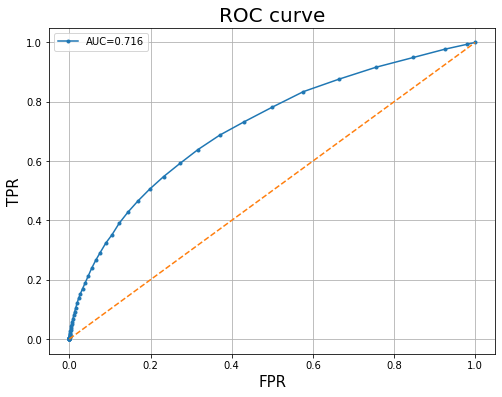

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train_test,RF_predictions_test)
auc = roc_auc_score(Y_train_test,RF_predictions_test)
mpl.figure(figsize=(8,6))
mpl.plot(fpr, tpr, marker='.')
mpl.plot([0, 1], [0, 1], linestyle='--')
mpl.title('ROC curve', fontsize = 20)
mpl.xlabel('FPR', fontsize=15)
mpl.ylabel('TPR', fontsize=15)
mpl.grid()
mpl.legend(["AUC=%.3f"%auc])
mpl.show()

In [70]:
RF_REG_OP_TEST.head(10)


,SK_ID_CURR,TESTED_TARGET
64282,174545,0.00
94645,209898,0.09
306349,454938,0.07
258314,398930,0.15
87597,201672,0.36
27731,132243,0.10
284391,429350,0.15
267734,410203,0.14
238789,376596,0.07
299374,446827,0.11


In [71]:
feature_importances.sort_values(by="importance",ascending=False)


,feature,importance
21,EXT_SOURCE_2,6.438326e-02
22,EXT_SOURCE_3,5.941450e-02
13,DAYS_BIRTH,4.623643e-02
15,DAYS_ID_PUBLISH,4.610502e-02
17,DAYS_REGISTRATION,4.561498e-02
...,...,...
49,NAME_INCOME_TYPE_Maternity leave,3.071403e-05
114,ORGANIZATION_TYPE_Religion,2.292957e-05
125,ORGANIZATION_TYPE_Trade: type 4,6.010625e-07
52,NAME_INCOME_TYPE_Student,5.553744e-07
